In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('game.csv')
print(df.shape)

(190052, 5)


In [4]:
df = df.drop_duplicates(keep='first')
print(df.shape)
df.head()

(161039, 5)


,ball_x,ball_y,ball_dx,ball_dy,paddle_y
0,0.5,0.5,0.5,0.5,0.0
1,1.0,1.0,0.5,0.5,0.0
2,1.5,1.5,0.5,0.5,0.0
3,2.0,2.0,0.5,0.5,0.0
4,2.5,2.5,0.5,0.5,0.0


In [5]:
X = df.drop(columns=['paddle_y'], axis=1)
y = df['paddle_y']

print(X.shape)
print(y.shape)

(161039, 4)
(161039,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
estimator = DecisionTreeRegressor()

parameters = {'max_depth':[1, 2, 3, 4, 5, 10, 20, 30, 50]}

grid = GridSearchCV(estimator = estimator, param_grid=parameters, cv=10, return_train_score=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] .

[CV] ..................................... max_depth=20, total=   0.2s
[CV] max_depth=20 ....................................................
[CV] ..................................... max_depth=20, total=   0.2s
[CV] max_depth=20 ....................................................
[CV] ..................................... max_depth=20, total=   0.3s
[CV] max_depth=20 ....................................................
[CV] ..................................... max_depth=20, total=   0.2s
[CV] max_depth=20 ....................................................
[CV] ..................................... max_depth=20, total=   0.2s
[CV] max_depth=20 ....................................................
[CV] ..................................... max_depth=20, total=   0.2s
[CV] max_depth=20 ....................................................
[CV] ..................................... max_depth=20, total=   0.2s
[CV] max_depth=20 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   14.1s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 20, 30, 50]},
             return_train_score=True, verbose=2)

In [8]:
results = pd.DataFrame.from_dict(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.039440,0.032319,0.002604,0.001046,1,{'max_depth': 1},0.010970,0.011820,0.006707,0.009305,...,0.010880,0.010545,0.010362,0.010309,0.010715,0.010312,0.010554,0.010680,0.010493,0.000203
1,0.043789,0.003468,0.002290,0.000451,2,{'max_depth': 2},0.180292,0.164798,0.178938,0.177566,...,0.184978,0.182402,0.185311,0.185074,0.182850,0.184046,0.183900,0.184604,0.184099,0.000928
2,0.058439,0.003669,0.002490,0.000493,3,{'max_depth': 3},0.263144,0.245297,0.266001,0.258816,...,0.269095,0.264809,0.270064,0.269044,0.266633,0.269523,0.268056,0.258684,0.266184,0.003886
3,0.073133,0.003847,0.002474,0.000514,4,{'max_depth': 4},0.412022,0.414824,0.429390,0.426574,...,0.422367,0.428976,0.421973,0.423246,0.422687,0.421329,0.422294,0.416539,0.422601,0.004234
4,0.086667,0.004286,0.002693,0.000457,5,{'max_depth': 5},0.550832,0.547763,0.564040,0.558008,...,0.558450,0.560258,0.566230,0.543801,0.542940,0.567579,0.545081,0.559203,0.556043,0.008529


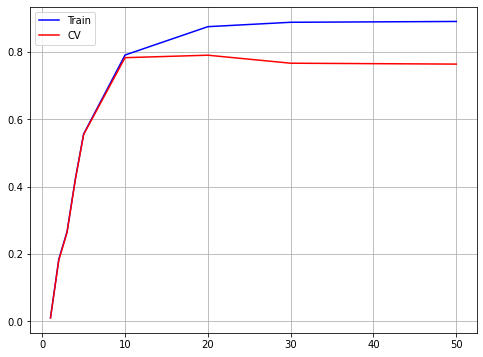

In [9]:
plt.figure(figsize=(8,6))
plt.plot(results['param_max_depth'], results['mean_train_score'], color='blue', label='Train')
plt.plot(results['param_max_depth'], results['mean_test_score'], color='red', label='CV')
plt.grid()
plt.legend()

In [10]:
grid.best_params_

{'max_depth': 20}

In [11]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=20)

In [13]:
predictions = grid.predict(X_test)
print('R2 score = {}'.format(r2_score(y_test, predictions)))

R2 score = 0.7992973010791035


In [17]:
import pickle

with open("model.pkl", "wb") as model:
    pickle.dump(grid.best_estimator_, model)